In this notebook we will explore the three methods and compare their results with a multiple linear regression model applied to Boston Housing dataset. The target variable is price and the features are 10 polynomial features of LSTAT: % lower status of the population. LSTAT2=  LSTAT2 , LSTAT3=  LSTAT3 , and etc.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [3]:
rand_state= 1000

In [4]:
df = pd.read_csv("Regularization_Boston.csv")

In [5]:
df.head()

,price,LSTAT,LSTAT2,LSTAT3,LSTAT4,LSTAT5,LSTAT6,LSTAT7,LSTAT8,LSTAT9,LSTAT10
0,24.0,4.98,24.8004,123.505992,615.059840,3062.998004,15253.730060,7.596358e+04,3.782986e+05,1.883927e+06,9.381957e+06
1,21.6,9.14,83.5396,763.551944,6978.864768,63786.823980,583011.571200,5.328726e+06,4.870455e+07,4.451596e+08,4.068759e+09
2,34.7,4.03,16.2409,65.450827,263.766833,1062.980336,4283.810755,1.726376e+04,6.957294e+04,2.803790e+05,1.129927e+06
3,33.4,2.94,8.6436,25.412184,74.711821,219.652754,645.779096,1.898591e+03,5.581856e+03,1.641066e+04,4.824733e+04
4,36.2,5.33,28.4089,151.419437,807.065599,4301.659644,22927.845900,1.222054e+05,6.513549e+05,3.471722e+06,1.850428e+07


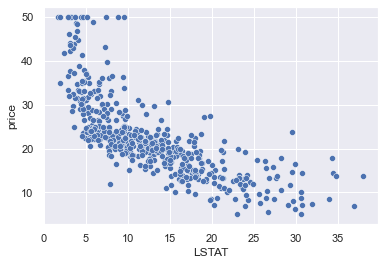

In [6]:
sns.scatterplot(x='LSTAT', y='price', data=df)
plt.show()

# 과제: 04_sklearn_penalization_1.ipynb의 과정을 위 데이터셋에 적용해 보는 것입니다!

# Q1. normalize the features!

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
df_sc = scaler.fit_transform(df)
df_sc[0]

array([ 0.15968566, -1.0755623 , -0.78952949, -0.56845926, -0.42533928,
       -0.33434062, -0.2740581 , -0.23195975, -0.20115811, -0.1777807 ,
       -0.15953586])

In [9]:
df.describe()

,price,LSTAT,LSTAT2,LSTAT3,LSTAT4,LSTAT5,LSTAT6,LSTAT7,LSTAT8,LSTAT9,LSTAT10
count,506.000000,506.000000,506.000000,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,22.532806,12.653063,210.993989,4285.788793,1.001336e+05,2.587609e+06,7.198029e+07,2.114923e+09,6.477077e+10,2.048399e+12,6.645292e+13
std,9.197104,7.141062,236.061920,7329.288372,2.342059e+05,7.737927e+06,2.628503e+08,9.126326e+09,3.223061e+11,1.153345e+13,4.169512e+14
min,5.000000,1.730000,2.992900,5.177717,8.957450e+00,1.549639e+01,2.680875e+01,4.637914e+01,8.023592e+01,1.388081e+02,2.401381e+02
25%,17.025000,6.950000,48.303700,335.727443,2.333481e+03,1.621932e+04,1.127384e+05,7.836504e+05,5.447333e+06,3.786664e+07,2.632333e+08
50%,21.200000,11.360000,129.050000,1466.017088,1.665411e+04,1.891930e+05,2.149266e+06,2.441612e+07,2.773731e+08,3.151037e+09,3.579677e+10
75%,25.000000,16.955000,287.472100,4874.091998,8.264029e+04,1.401168e+06,2.375683e+07,4.027977e+08,6.829447e+09,1.157935e+11,1.963285e+12
max,50.000000,37.970000,1441.720900,54742.142570,2.078559e+06,7.892289e+07,2.996702e+09,1.137850e+11,4.320410e+12,1.640460e+14,6.228820e+15


In [10]:
df_sc = pd.DataFrame(df_sc, columns=df.columns)
df_sc.head()

,price,LSTAT,LSTAT2,LSTAT3,LSTAT4,LSTAT5,LSTAT6,LSTAT7,LSTAT8,LSTAT9,LSTAT10
0,0.159686,-1.075562,-0.789529,-0.568459,-0.425339,-0.334341,-0.274058,-0.231960,-0.201158,-0.177781,-0.159536
1,-0.101524,-0.492439,-0.540454,-0.481046,-0.398141,-0.326485,-0.271896,-0.231384,-0.201008,-0.177742,-0.159526
2,1.324247,-1.208727,-0.825825,-0.576388,-0.426841,-0.334599,-0.274100,-0.231966,-0.201159,-0.177781,-0.159536
3,1.182758,-1.361517,-0.858040,-0.581856,-0.427649,-0.334708,-0.274114,-0.231968,-0.201159,-0.177781,-0.159536
4,1.487503,-1.026501,-0.774228,-0.564647,-0.424519,-0.334180,-0.274029,-0.231955,-0.201157,-0.177781,-0.159536


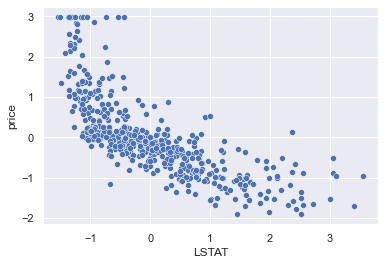

In [11]:
sns.scatterplot(x='LSTAT', y='price', data=df_sc)
plt.show()

# Q2. Splitting the data (train / test)
test_size=0.2, random_state=rand_state

In [13]:
y = df_sc['price']
X = df_sc.drop('price', axis=1)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state )

# Q3. Training the models

1. Linear regression (model_linear)
2. Ridge regression (model_ridge)
3. Lasso regression (model_lasso)
4. Elastic Net regression (model_net)

In [15]:
from sklearn.linear_model import LinearRegression, Ridge,RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

In [16]:
# starting with default parameters:
model_linear = LinearRegression()
model_ridge = Ridge(alpha=0)
model_lasso = Lasso(alpha=0)
model_net = ElasticNet(alpha=0)

In [17]:
y_linear = model_linear.fit(X_train, y_train).predict(X_test)
y_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_net = model_net.fit(X_train, y_train).predict(X_test)

In [18]:
df_predictions = pd.DataFrame({'y_test':y_test,
                               'y_linear':y_linear,
                               'y_ridge':y_ridge,
                               'y_lasso':y_lasso,
                               'y_net':y_net})
df_predictions.head()

,y_test,y_linear,y_ridge,y_lasso,y_net
483,-0.079757,-0.019459,-0.019460,-0.045446,-0.045446
426,-1.342272,-0.480570,-0.480569,-0.570717,-0.570717
22,-0.798084,-0.736176,-0.736176,-0.725662,-0.725662
268,2.282016,2.053967,2.053966,1.677233,1.677233
371,2.989460,0.041490,0.041490,0.092521,0.092521


In [19]:
# coefficients
df.drop('price', axis=1, inplace=False).columns

Index(['LSTAT', 'LSTAT2', 'LSTAT3', 'LSTAT4', 'LSTAT5', 'LSTAT6', 'LSTAT7',
       'LSTAT8', 'LSTAT9', 'LSTAT10'],
      dtype='object')

In [20]:
coefficients = pd.DataFrame({'Features':df.drop('price', axis=1, inplace=False).columns})
coefficients['model_linear'] = model_linear.coef_
coefficients['model_ridge'] = model_ridge.coef_
coefficients['model_lasso'] = model_lasso.coef_
coefficients['model_net'] = model_net.coef_
coefficients

,Features,model_linear,model_ridge,model_lasso,model_net
0,LSTAT,10.485596,10.485284,-3.228960,-3.228960
1,LSTAT2,-198.447364,-198.444057,4.262709,4.262709
2,LSTAT3,1218.536030,1218.520690,-1.106289,-1.106289
3,LSTAT4,-4039.520118,-4039.486886,-1.021523,-1.021523
4,LSTAT5,8029.887443,8029.879606,-0.194564,-0.194564
5,LSTAT6,-9630.657708,-9630.786683,0.218500,0.218500
6,LSTAT7,6399.310967,6399.624532,0.269441,0.269441
7,LSTAT8,-1554.634424,-1554.981699,0.159197,0.159197
8,LSTAT9,-523.920936,-523.727594,0.013454,0.013454
9,LSTAT10,288.174048,288.130340,-0.113261,-0.113261


# Q4. Performance in the test set for 4 models.

In [21]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_linear']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

0.541

In [22]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_ridge']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

0.541

In [23]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_lasso']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

0.556

In [24]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_net']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

0.556

# Q5. Plotting the regression coefficients vs alphas:

## 1) Ridge

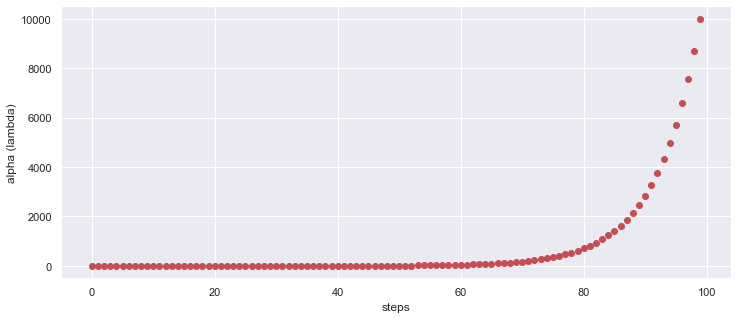

In [25]:
alpha_ridge = 10 ** np.linspace(-2, 4, 100)
plt.figure(figsize=(12, 5))
plt.plot(alpha_ridge, 'or')
plt.xlabel('steps')
plt.ylabel('alpha (lambda)')
plt.show()

In [27]:
ridge = Ridge()
coefs_ridge = []

for i in alpha_ridge:
    ridge.set_params(alpha = i)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
np.shape(coefs_ridge)

(100, 10)

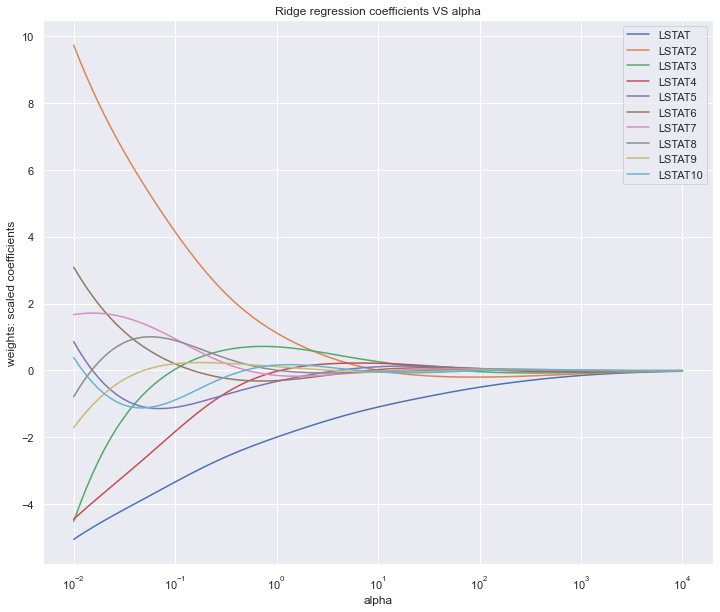

In [28]:
plt.figure(figsize=(12, 10))
ax = plt.gca()
ax.plot(alpha_ridge, coefs_ridge)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Ridge regression coefficients VS alpha')
plt.legend(df.drop('price', axis=1, inplace=False).columns)

## 2) Lasso

In [30]:
alpha_lasso = 10 ** np.linspace(-3, 1, 100) 

In [31]:
lasso = Lasso()
coefs_lasso = [] 

for i in alpha_lasso:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    
np.shape(coefs_lasso)

(100, 10)

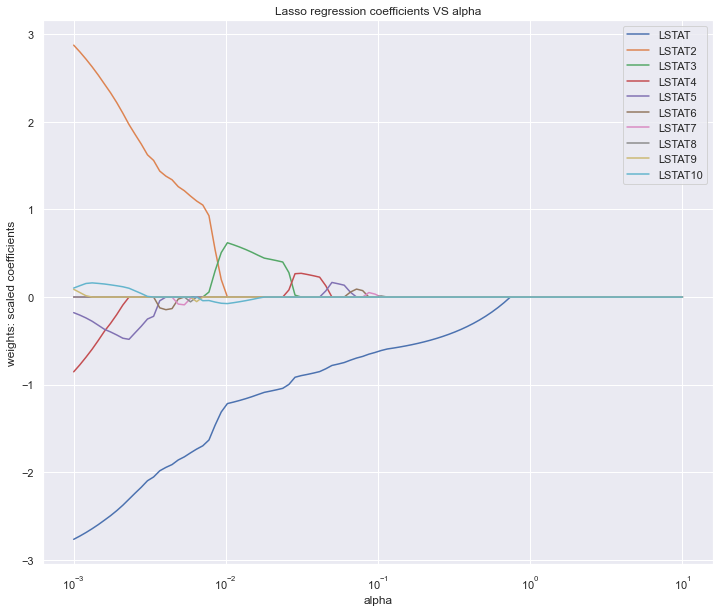

In [32]:
plt.figure(figsize=(12, 10))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients VS alpha')
plt.legend(df.drop('price', axis=1, inplace=False).columns)

## 3) ElasticNet

In [34]:
alpha_elasticnet = 10 ** np.linspace(-3, 2, 100)

In [35]:
elasticnet = ElasticNet()
coefs_elasticnet = []

for i in alpha_elasticnet:
    elasticnet.set_params(alpha = i)
    elasticnet.fit(X_train, y_train)
    coefs_elasticnet.append(elasticnet.coef_)
    
np.shape(coefs_elasticnet)

(100, 10)

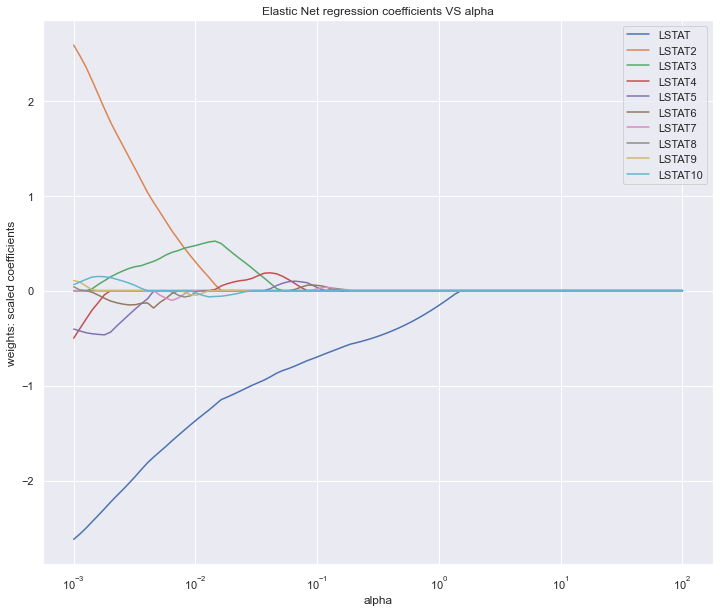

In [36]:
plt.figure(figsize=(12, 10))
ax = plt.gca()
ax.plot(alpha_elasticnet, coefs_elasticnet)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Elastic Net regression coefficients VS alpha')
plt.legend(df.drop('price', axis=1, inplace=False).columns)

# Q6. Cross Validation

## 1) Ridge

In [37]:
ridgecv = RidgeCV()
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.1

In [38]:
alpha_ridge_opt = ridgecv.alpha_

## 2) Lasso

In [39]:
lassocv = LassoCV()
lassocv.fit(X_train, y_train)
lassocv.alpha_

0.0007404280761639708

In [40]:
alpha_lasso_opt = lassocv.alpha_

## 3) ElasticNet

In [41]:
elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train, y_train)
elasticnetcv.alpha_

0.0014808561523279417

In [42]:
elasticnetcv.l1_ratio_

0.5

# Done!